## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Read Data

In [2]:
# 고객 데이터 읽기
demo = pd.read_csv('../data/Demo.csv', encoding='cp949')
print('고객 데이터 크기:', demo.shape)

# 구매 데이터 읽기
purchase = pd.read_csv('../data/구매내역정보.csv', encoding='cp949')
print('구매 데이터 크기:', purchase.shape)

고객 데이터 크기: (3542, 4)
구매 데이터 크기: (101692, 9)


In [3]:
# 특별히 전처리할 column이 없다.
demo.sample(5)

,ID,성별,연령,거주지역
1053,192342761,2,59,부산 수영구
852,941046914,2,60,서울 영등포구
1178,784655847,1,58,경기 성남시
1023,615322673,1,59,부산 강서구
1752,292863602,2,55,부산 동구


In [4]:
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
7255,40012235,식품,농산물,경기 고양시,20140530,12,2,12000,0
1134,864551451,가전제품,TV/AV,서울 송파구,20140705,10,1,1634000,0
41350,158108371,식품,가공식품,서울 송파구,20141227,15,1,13000,0
72845,456108195,식품,축산물,부산 중구,20140725,17,1,8000,0
33149,543745613,의류잡화,여성용의류-SPA,서울 관악구,20141026,14,1,35000,0


### 상품중분류명

In [5]:
# 의류잡화가 가장 세세히 구분되어 있다.
purchase.groupby('상품대분류명')['상품중분류명'].unique()

상품대분류명
가구                                                   [가구]
가전제품    [주방가전, TV/AV, 휴대폰/태블릿, 생활가전, PC/노트북/프린터/카메라, 컴...
레포츠                                   [골프용품/의류, 스포츠용품/의류]
명품                                                   [명품]
생활잡화                               [화장품, 주방용품, 침구류, 생활용품]
식품                        [농산물, 음료, 가공식품, 수산물, 축산물, 건강식품]
의류잡화    [여성용의류-정장류, 남성용의류-캐주얼, 여성용의류-SPA, 남성용의류-정장류, 아...
Name: 상품중분류명, dtype: object

In [6]:
# 상위 5개 환불 상품중분류명 모두 의류잡화이다.
purchase.groupby('상품중분류명')['취소여부'].sum().sort_values(ascending=False).iloc[:5]

상품중분류명
여성용의류-SPA    1832
스포츠용품/의류      913
여성용의류-정장류     885
남성용의류-캐주얼     491
구두            434
Name: 취소여부, dtype: int64

### 구매지역

In [7]:
# 서울, 경기, 부산에서 이루어진 거래만 대상으로 한다.
purchase['구매지역'].str.split(' ', expand=True)[0].value_counts()

서울    49838
경기    31248
부산    20606
Name: 0, dtype: int64

In [8]:
# 여러 매장을 이용하는 고객도 있다.
purchase.groupby('ID')['구매지역'].nunique().value_counts()

1     1417
2     1233
3      571
4      208
5       75
6       27
7        5
8        4
13       1
11       1
Name: 구매지역, dtype: int64

### 거래 기간

In [9]:
print('거래 기간: ', purchase['구매일자'].min(), '~', purchase['구매일자'].max())

거래 기간:  20140101 ~ 20141231


In [10]:
# [DC] 컬럼명을 구매일로 바꾼다.
purchase['구매일'] = purchase['구매일자'].copy()
purchase.head()

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일
0,410362886,의류잡화,여성용의류-정장류,서울 송파구,20140510,1,1,198000,0,20140510
1,643279402,식품,농산물,경기 성남시,20140612,1,1,2000,0,20140612
2,643279402,식품,농산물,경기 성남시,20140612,1,1,4000,0,20140612
3,643279402,식품,농산물,경기 성남시,20140612,1,1,5000,0,20140612
4,643279402,식품,농산물,경기 성남시,20140612,1,1,9000,0,20140612


### 매장 영업 시간
- 롯데 계열사의 영업 시간은 10시부터 20시까지이다.

In [11]:
# [DC] 영업시간 외의 데이터는 삭제한다.
purchase = purchase.query('10 <= 구매시간 <= 20').reset_index(drop=True)
print('데이터 크기:', purchase.shape)

데이터 크기: (101325, 10)


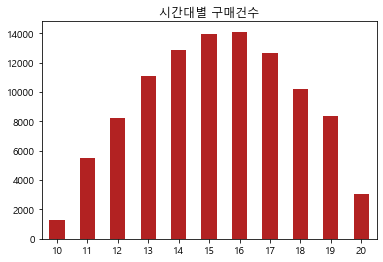

In [12]:
purchase.구매시간.value_counts().sort_index().plot.bar(title="시간대별 구매건수", color='firebrick', rot=0)
plt.show()

### `구매일자`

In [13]:
# [DC] 구매일과 구매시간을 합친다.
purchase['구매일자'] = pd.to_datetime(purchase['구매일'].astype(str)+purchase['구매시간'].astype(str).str.zfill(2), 
                                      format='%Y%m%d%H')
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일
80125,42091629,식품,농산물,부산 해운대구,2014-06-25 18:00:00,18,1,1000,0,20140625
58407,382524561,레포츠,스포츠용품/의류,서울 강서구,2014-10-19 16:00:00,16,1,9000,0,20141019
87213,763676829,식품,농산물,서울 노원구,2014-01-19 18:00:00,18,2,7000,0,20140119
13958,876943706,식품,가공식품,서울 관악구,2014-09-14 12:00:00,12,3,6000,0,20140914
2404,200724538,식품,음료,경기 안양시,2014-11-28 11:00:00,11,1,5000,0,20141128


In [14]:
# 멤버십 데이터다보니 같은 날 다른 지역에서 구매한 데이터가 있다.
purchase.groupby(['ID','구매일자'])['구매지역'].nunique().value_counts()

1    53165
2       16
Name: 구매지역, dtype: int64

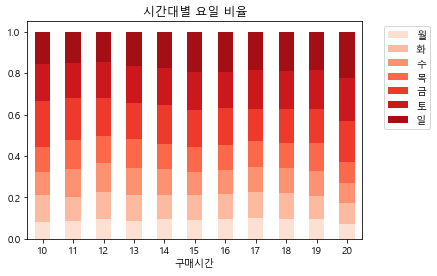

In [15]:
# 금토일 이용률이 높으며 금은 오픈 시간에, 토와 일은 늦은 시간의 방문이 많다.
ease = pd.pivot_table(purchase, index=purchase['구매일자'].dt.weekday, columns='구매시간', values='구매금액',aggfunc=np.size)
ease.loc[7, :] = ease.sum()
ease = ease.divide(ease.loc[7]).iloc[:-1]
ease.index=list('월화수목금토일')

ease.T.plot.bar(stacked=True, title="시간대별 요일 비율", rot=0, color=sns.color_palette('Reds',7))
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

### 구매금액
`질문` 구매금액이 0원인 건 증정상품인가?
- 같은 일자, 시간에 구매한 동일 상품군 제품과 같이 환불하는 것을 보아 증정상품으로 가정할 수 있다.
- 모든 구매금액 0원 데이터에 대해 해당 거래 발생 일자, 시간에 같은 상품군을 구매했음을 확인했다. 증정상품으로 봐도 무방하다.
- 증정상품 수령을 위해 본 상품 최대 구매개수, 가격과 증정 이벤트 이용횟수로 고객의 특성을 구분할 수 있을 것이다.

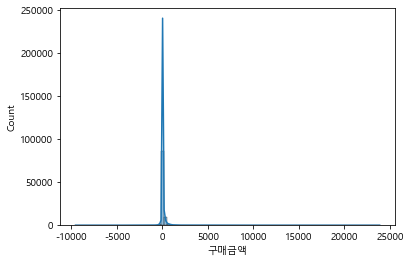

In [16]:
# 구매금액 분포가 0을 중심으로 흩어져있다.
sns.histplot(purchase['구매금액']/1000, bins=100, kde=True)
plt.show()

In [17]:
# 구매금액이 0인 202개의 데이터가 있다.
# purchase.query('구매금액==0')
print('구매금액이 0인 거래수:', purchase.query('구매금액==0').shape[0])

구매금액이 0인 거래수: 197


In [18]:
# 그 중 취소여부가 1인 6개 데이터가 있어 자세히 살펴 데이터의 발생을 추측해본다.
# purchase.query('구매금액==0').취소여부.value_counts()
purchase.query('구매금액==0 and 취소여부==1').sort_values('구매일자')

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일
60667,553914004,레포츠,스포츠용품/의류,부산 부산진구,2014-02-07 16:00:00,16,-5,0,1,20140207
46795,553914004,의류잡화,여성용의류-SPA,부산 부산진구,2014-05-23 15:00:00,15,-6,0,1,20140523
13743,841530519,레포츠,스포츠용품/의류,부산 부산진구,2014-06-03 12:00:00,12,-3,0,1,20140603
89527,966149513,식품,음료,서울 강남구,2014-07-09 18:00:00,18,-1,0,1,20140709
44021,351800310,레포츠,스포츠용품/의류,부산 부산진구,2014-08-10 15:00:00,15,-3,0,1,20140810
73346,492842607,의류잡화,구두,부산 부산진구,2014-09-14 17:00:00,17,-1,0,1,20140914


In [19]:
# 9개 의류잡화(여성용의류-SPA)를 8000원, 1개의 의류잡화(여성용의류-SPA)를 9000원에 구매한 때 추가로 6개 0원에 구매함.
# 같은 시간대 구매한 10개의 의류잡화(여성용의류-SPA) 환불 시 6개도 같이 환불함
purchase.query('ID==553914004 and 구매일자 <= 20140523').sort_values(by=['구매일자','구매시간','취소여부'])
# 49개의 레포츠(스포츠용품/의류)를 44000원에 구매할 때 추가로 5개 0원에 구매함. 49개 환불 시 5개도 같이 환불함
purchase.query('ID==553914004 and 구매일자 <= 20140207').sort_values(by=['구매일자','구매시간','취소여부'])

# 97개 레포츠(스포츠용품/의류)를 86000원에 구매할 때 추가로 3개 0원에 구매함. 97개 환불 시 3개도 같이 환불함
purchase.query('ID==841530519 and 구매일자 <= 20140603').sort_values(by=['구매일자','구매시간','취소여부'])

# 같은 식품군 10개를 구매한 때 추가로 1개 0원에 구매함. 같은 시간대 구매한 7개 환불 시 1개도 같이 환불함
purchase.query('ID==966149513 and 구매일자 <= 20140709').sort_values(by=['구매일자','구매시간','취소여부'])

# 97개 레포츠(스포츠용품/의류)를 86000원에 구매할 때 추가로 3개 0원에 구매함. 97개 환불 시 3개도 같이 환불함
purchase.query('ID==351800310 and 구매일자 <= 20140810').sort_values(by=['구매일자','구매시간','취소여부'])

# 1개 의류잡화(구두)를 89000원, 1개의 의류잡화(구두)를 9000원에 구매한 때 추가로 1개 0원에 구매함.
# 같은 시간대 구매한 2개의 의류잡화(구두) 환불 시 1개도 같이 환불함
purchase.query('ID==492842607 and 구매일자 <= 20140914').sort_values(by=['구매일자','구매시간','취소여부'])

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일
73342,492842607,레포츠,스포츠용품/의류,부산 부산진구,2014-02-22 17:00:00,17,1,141000,0,20140222
59827,492842607,레포츠,스포츠용품/의류,부산 부산진구,2014-03-28 16:00:00,16,1,72000,0,20140328
93762,492842607,레포츠,스포츠용품/의류,부산 부산진구,2014-03-30 19:00:00,19,-1,-72000,1,20140330
59828,492842607,의류잡화,구두,부산 중구,2014-05-02 16:00:00,16,1,167000,0,20140502
10954,492842607,식품,가공식품,부산 중구,2014-05-03 12:00:00,12,1,46000,0,20140503
73354,492842607,의류잡화,여성용의류-고급의류,부산 부산진구,2014-07-21 17:00:00,17,9,80000,0,20140721
32539,492842607,레포츠,스포츠용품/의류,부산 중구,2014-08-25 14:00:00,14,1,9000,0,20140825
32540,492842607,레포츠,스포츠용품/의류,부산 중구,2014-08-25 14:00:00,14,1,18000,0,20140825
32541,492842607,레포츠,스포츠용품/의류,부산 중구,2014-08-25 14:00:00,14,1,48000,0,20140825
46014,492842607,레포츠,스포츠용품/의류,부산 중구,2014-08-25 15:00:00,15,1,106000,0,20140825


In [20]:
for _, ID, RDATE, P in purchase.query('구매금액 == 0')[['ID','구매일자', '상품대분류명']].itertuples():
    # 본 상품 추출하기
    if purchase.query('ID == @ID and 구매일자 == @RDATE and 상품대분류명 == @P').shape[0] <= 0:
        print(f'증정상품 아님: {ID}, {RDATE}')
else:
    print('202개 모두 증정상품으로 볼 수 있다.')

202개 모두 증정상품으로 볼 수 있다.


In [21]:
# [DC] 증정상품이란 binary column을 생성한다.
purchase['증정상품'] = purchase['구매금액'].apply(lambda x: 1 if x==0 else 0)

## Save data

In [22]:
purchase.to_csv('../data/DC_구매내역정보.csv', index=False, encoding='cp949')